In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [264]:
df= pd.read_csv('playstore-Dataset.csv') # dataframe
df.drop(columns=['Unnamed: 0'], axis=1,inplace=True) # dropped an extra column which is created when converting any dataset to csv

CLEANING

In [265]:
df2 = df.copy() # created a copy to not alter inside original dataset

In [266]:
df2.info() # only Rating column has number values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [267]:
df2.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [268]:
df2.isnull().sum() # "Rating" Column has 1474 Null Values, whereas "Type" and "Content Rating" has 1 Null values each.
#Current Ver" and "Android Ver" have 8 and 3 Null Values respectively.

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [269]:
df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [270]:
df2['Reviews'].isnull().any() # has no null values


np.False_

In [271]:
df2['Reviews'].str.isnumeric().sum()
# dataset has a total of 10841 entries, "Reviews" column consists of 10840 numeric 1 non-numeric entry.

np.int64(10840)

In [272]:
df2[~df2['Reviews'].str.isnumeric()] # the value which isnon numeric is filtered out

# it says 3.0M, M means million. i.e. 3000000

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [273]:
df2[~df2['Reviews'].str.isnumeric()] # ~ : negation

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [274]:
df2['Reviews']=df2['Reviews'].replace('3.0M',"3000000")

In [275]:
df2['Reviews']=df2['Reviews'].astype(int)

In [276]:
df2.info() # Reviws Column has been cleaned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [277]:
# cleaning "Size" Column
df2['Size'].unique() # all are non-numeric and one vale is "Varies with device"

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [278]:
df2['Size']=df2['Size'].str.replace('M','000')
df2['Size']=df2['Size'].str.replace('k','')
df2['Size']= df2['Size'].replace('Varies with device',np.nan)
df2['Size']= df2['Size'].replace('1,000+','1000')
df2['Size']=df2['Size'].astype(float)
# now the "Size" Column is cleaned and it shows size in k (thousands)

In [279]:
df2['Installs'].unique() # it has "+" which is to be removed, it also has "Free" value

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [280]:
df2['Price'].unique() # This has "$" which is to be removed

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [281]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df2[cols]=df2[cols].str.replace(item,'')

In [282]:
df2['Installs']=df2['Installs'].replace('Free',0)
df2['Installs']=df2['Installs'].astype(float)

In [283]:
df2['Price']=df2['Price'].replace('Everyone',np.nan)
df2['Price']=df2['Price'].astype(float)
df2['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,    nan,   1.2 ,   1.04])

In [284]:
# "Last Updated" cloumn
df2['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      shape=(1378,), dtype=object)

In [285]:
df2['Last Updated']=pd.to_datetime(df2['Last Updated'],  errors='coerce')
df2["last_updated_day"]=df2['Last Updated'].dt.day
df2["last_updated_month"]=df2['Last Updated'].dt.month
df2["last_updated_year"]=df2['Last Updated'].dt.year
df2


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,last_updated_day,last_updated_month,last_updated_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7.0,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15.0,1.0,2018.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1.0,8.0,2018.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8.0,6.0,2018.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20.0,6.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25.0,7.0,2017.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6.0,7.0,2018.0
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000.0,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20.0,1.0,2017.0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19.0,1.0,2015.0


EDA

In [286]:
# Average Installs by category
g1=df2.groupby(['Category'])['Installs'].mean()
g1

Category
1.9                    0.000000e+00
ART_AND_DESIGN         1.912894e+06
AUTO_AND_VEHICLES      6.250613e+05
BEAUTY                 5.131519e+05
BOOKS_AND_REFERENCE    8.318050e+06
BUSINESS               2.178076e+06
COMICS                 9.347692e+05
COMMUNICATION          8.435989e+07
DATING                 1.129533e+06
EDUCATION              5.586231e+06
ENTERTAINMENT          1.925611e+07
EVENTS                 2.495806e+05
FAMILY                 5.201959e+06
FINANCE                2.395215e+06
FOOD_AND_DRINK         2.156683e+06
GAME                   3.066960e+07
HEALTH_AND_FITNESS     4.642441e+06
HOUSE_AND_HOME         1.917187e+06
LIBRARIES_AND_DEMO     7.411284e+05
LIFESTYLE              1.407444e+06
MAPS_AND_NAVIGATION    5.286729e+06
MEDICAL                1.150269e+05
NEWS_AND_MAGAZINES     2.648876e+07
PARENTING              5.253518e+05
PERSONALIZATION        5.932385e+06
PHOTOGRAPHY            3.011417e+07
PRODUCTIVITY           3.343418e+07
SHOPPING           

In [287]:
df2=df2.drop_duplicates() # duplicates removed

In [288]:
df2['Category'].value_counts() # . value_counts gives count of each Category

Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

## OBSERVATION:
Family Category has maximum Apps

In [289]:
# numerical and categorical features in dataset
# we use list comprehension and .dtype method. here, 'O' stands for object data type

numerical_features=[feature for feature in df2.columns if df2[feature].dtype != 'O']
categorical_features=[feature for feature in df2.columns if df2[feature].dtype == 'O']

print(f'There are {len(numerical_features)} numerical features: {numerical_features}')
print(f'There are {len(categorical_features)} categorical features: {categorical_features}')



There are 9 numerical features: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'last_updated_day', 'last_updated_month', 'last_updated_year']
There are 7 categorical features: ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [290]:
# Proprtion of categorical value of each feature (column)

for col in categorical_features:
    print(df2[col].value_counts(normalize=True)*100) # normalize will normalize the value
    print("--------------------------")

# The Family Category apps consists of 18.75%

App
ROBLOX                           0.086889
8 Ball Pool                      0.067581
Helix Jump                       0.057926
Bubble Shooter                   0.057926
Zombie Catchers                  0.057926
                                   ...   
Fr. Daoud Lamei                  0.009654
Poop FR                          0.009654
PLMGSS FR                        0.009654
List iptv FR                     0.009654
Kids Paint Free - Drawing Fun    0.009654
Name: proportion, Length: 9660, dtype: float64
--------------------------
Category
FAMILY                 18.758448
GAME                   10.822553
TOOLS                   8.138637
BUSINESS                4.122417
MEDICAL                 3.938984
PRODUCTIVITY            3.929330
PERSONALIZATION         3.745897
LIFESTYLE               3.601081
COMMUNICATION           3.533501
FINANCE                 3.475574
SPORTS                  3.388685
PHOTOGRAPHY             3.108708
HEALTH_AND_FITNESS      2.954238
SOCIAL                

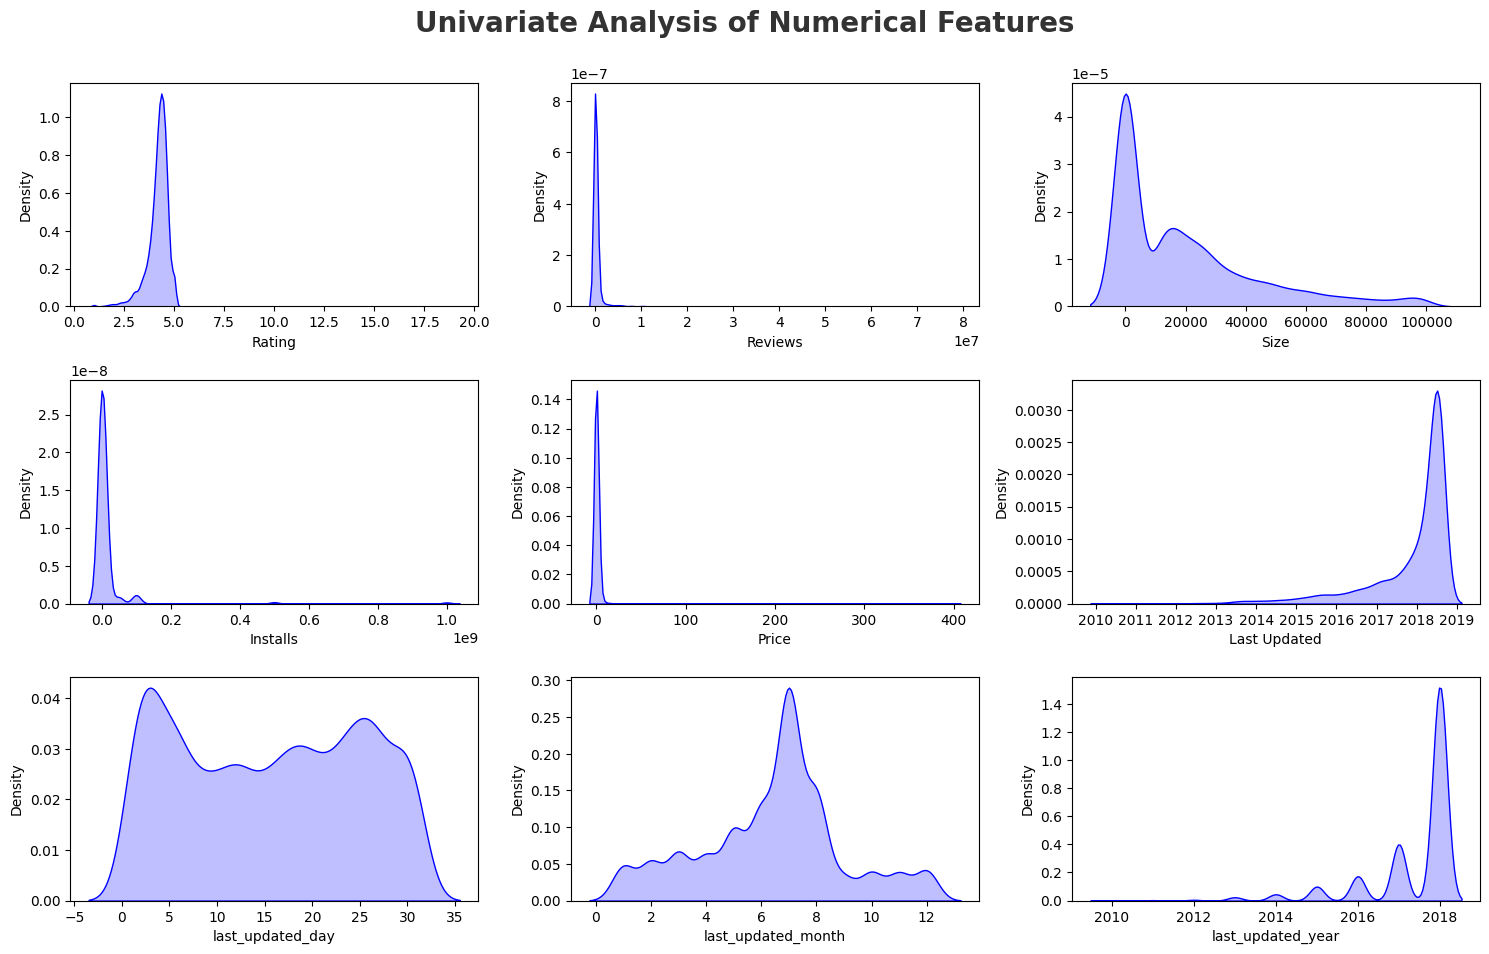

In [325]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df2[numerical_features[i]],  shade=True, color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

## Observations
- Rating and Year is left skewed while Reviews,Size,Installs and Price are right skewed
- therefore, Rating and Year have outliers on right and Reviews,Size,Installs have outliers on left

In [ ]:
# Proportion of count data on categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[categorical_features[i]],palette="Set2")
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

In [355]:
# MOST POPULAR APP CATEGORY

# determined my no. of installs

cat_gby=df2.groupby('Category')['Installs'].sum().reset_index().sort_values('Installs',ascending=False)


top_5_Category= cat_gby[:5] # top 5 popular app categories
print(top_5_Category)
cat_gby

         Category      Installs
15           GAME  3.154402e+10
7   COMMUNICATION  2.415228e+10
28         SOCIAL  1.251387e+10
26   PRODUCTIVITY  1.246309e+10
30          TOOLS  1.145277e+10


,Category,Installs
15,GAME,3.154402e+10
7,COMMUNICATION,2.415228e+10
28,SOCIAL,1.251387e+10
26,PRODUCTIVITY,1.246309e+10
30,TOOLS,1.145277e+10
12,FAMILY,1.004169e+10
25,PHOTOGRAPHY,9.721248e+09
31,TRAVEL_AND_LOCAL,6.361887e+09
32,VIDEO_PLAYERS,6.222003e+09
22,NEWS_AND_MAGAZINES,5.393218e+09


## Insights
1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least number of apps belong to the Beauty , Events categories with less than 1% of the total apps belonging to it.

<Axes: ylabel='Installs'>

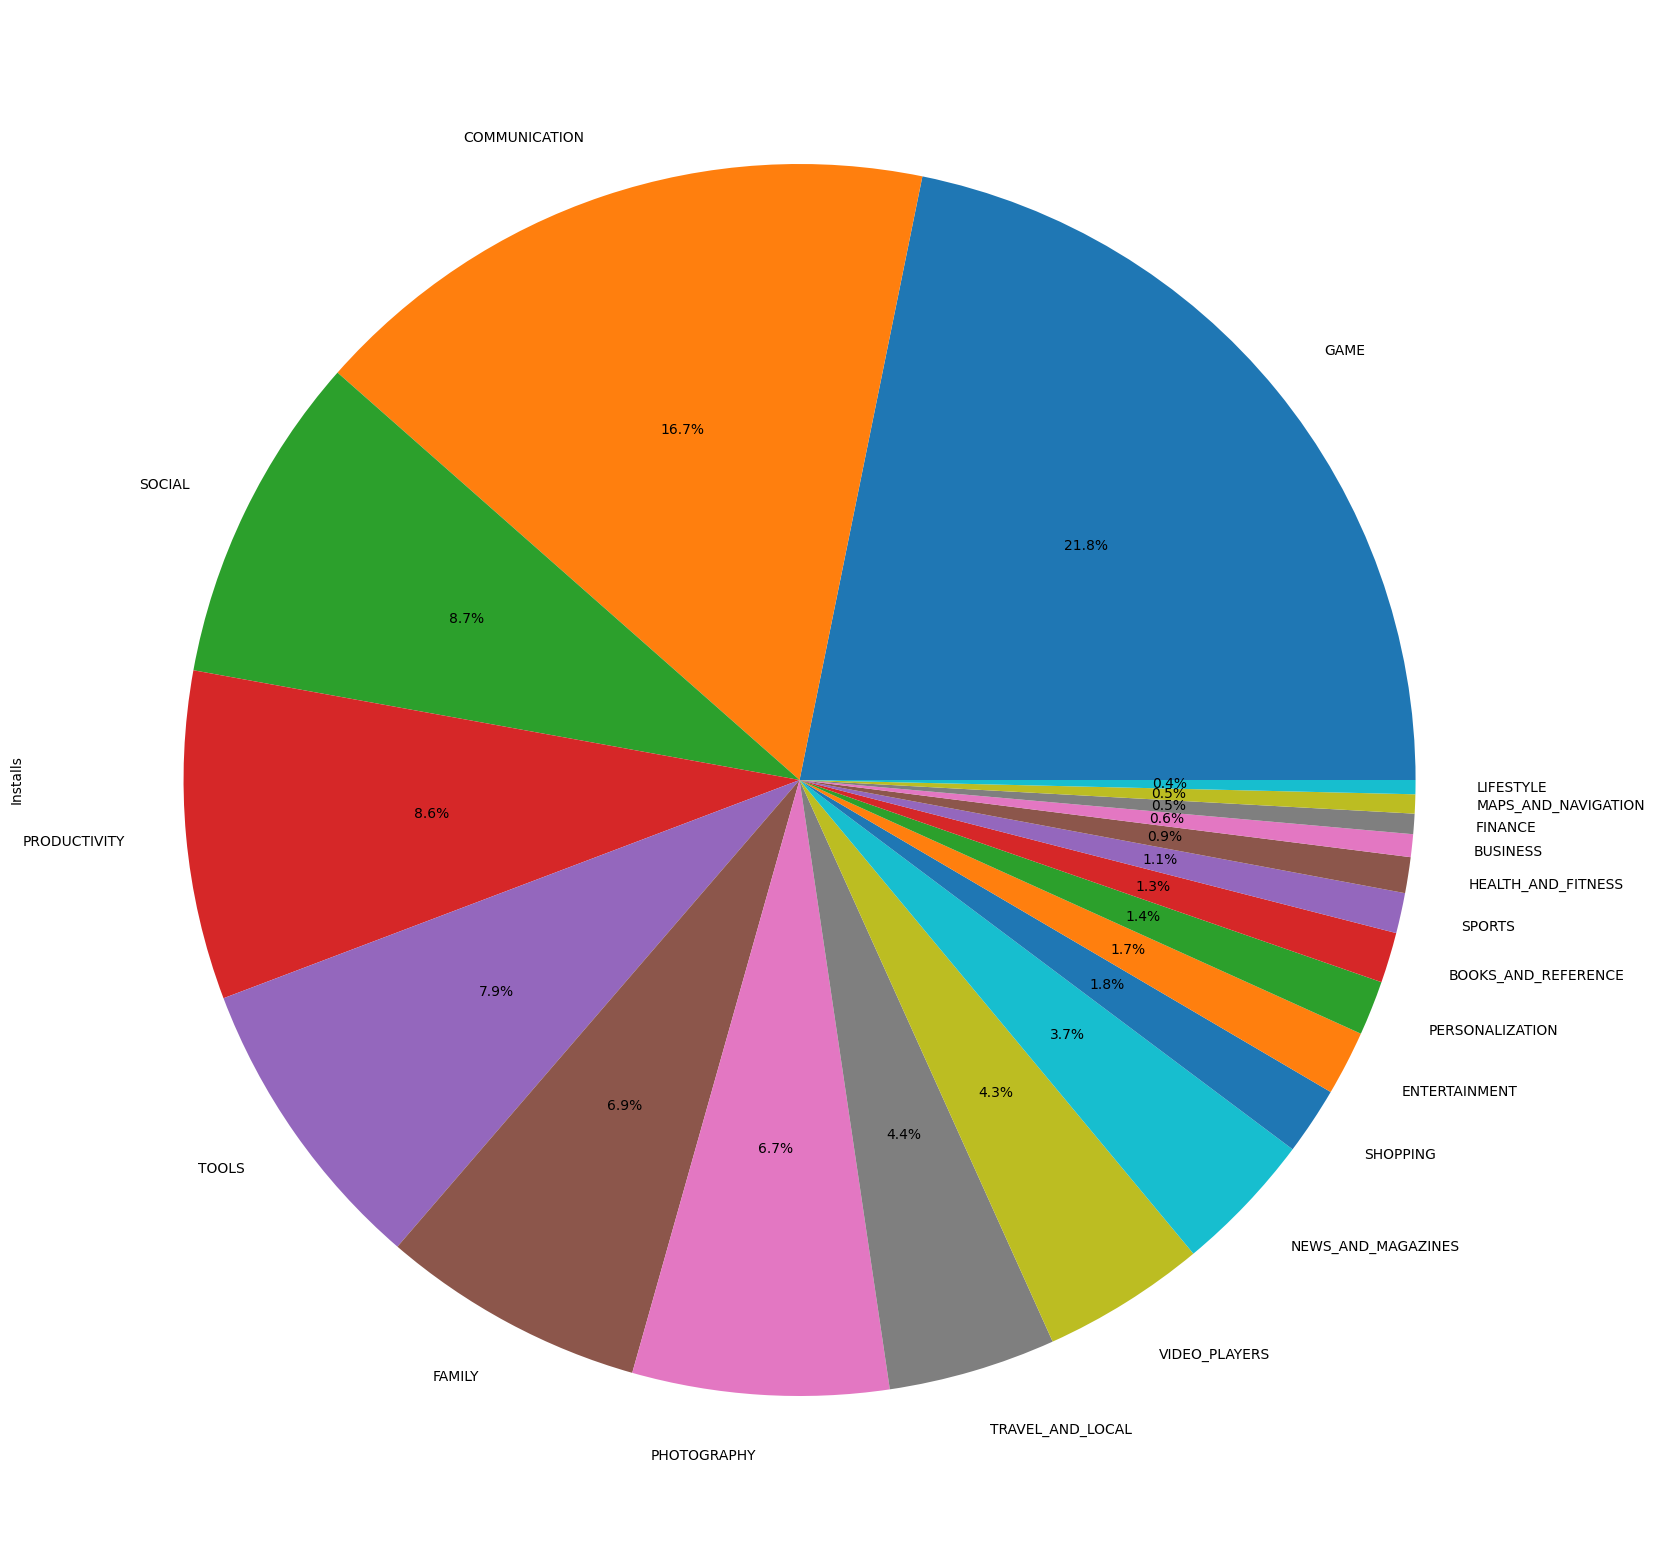

In [351]:
cat_gby[:20].plot(
    kind='pie',
    y='Installs',
    labels=cat_gby['Category'],
    autopct='%1.1f%%',
    figsize=(30,20),
    legend=False)

## Observations

1. There are more kinds of apps in playstore which are under category of family, games & tools
2. Beatuty,comics,arts and weather kinds of apps are very less in playstore

Top 10 Categories are: 
           Category  count
0           FAMILY   1943
1             GAME   1121
2            TOOLS    843
3         BUSINESS    427
4          MEDICAL    408
5     PRODUCTIVITY    407
6  PERSONALIZATION    388
7        LIFESTYLE    373
8    COMMUNICATION    366
9          FINANCE    360


<Axes: xlabel='Category'>

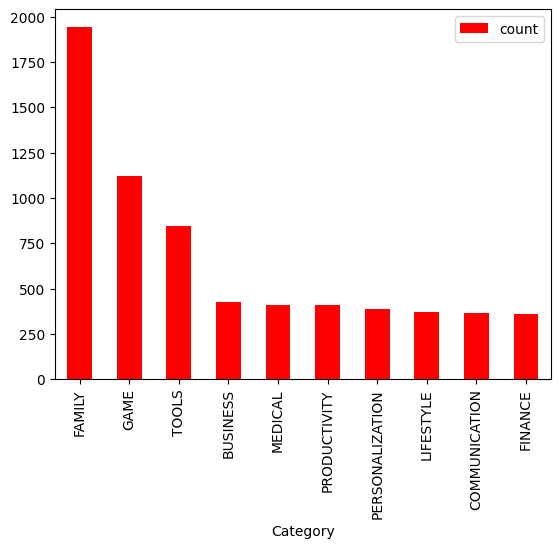

In [ ]:
# top 10 app categories

print("Top 10 Categories are: \n",df2['Category'].value_counts().reset_index().sort_values('count',ascending=False)[:10]) # this gives count of occurences of each "Category" in the dataset

df2['Category'].value_counts().reset_index().sort_values('count',ascending=False)[:10].plot(kind='bar',x='Category',y='count'[:5],grid=False,color='r') # count of top 10 categories

## Which Category has largest number of installations??

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

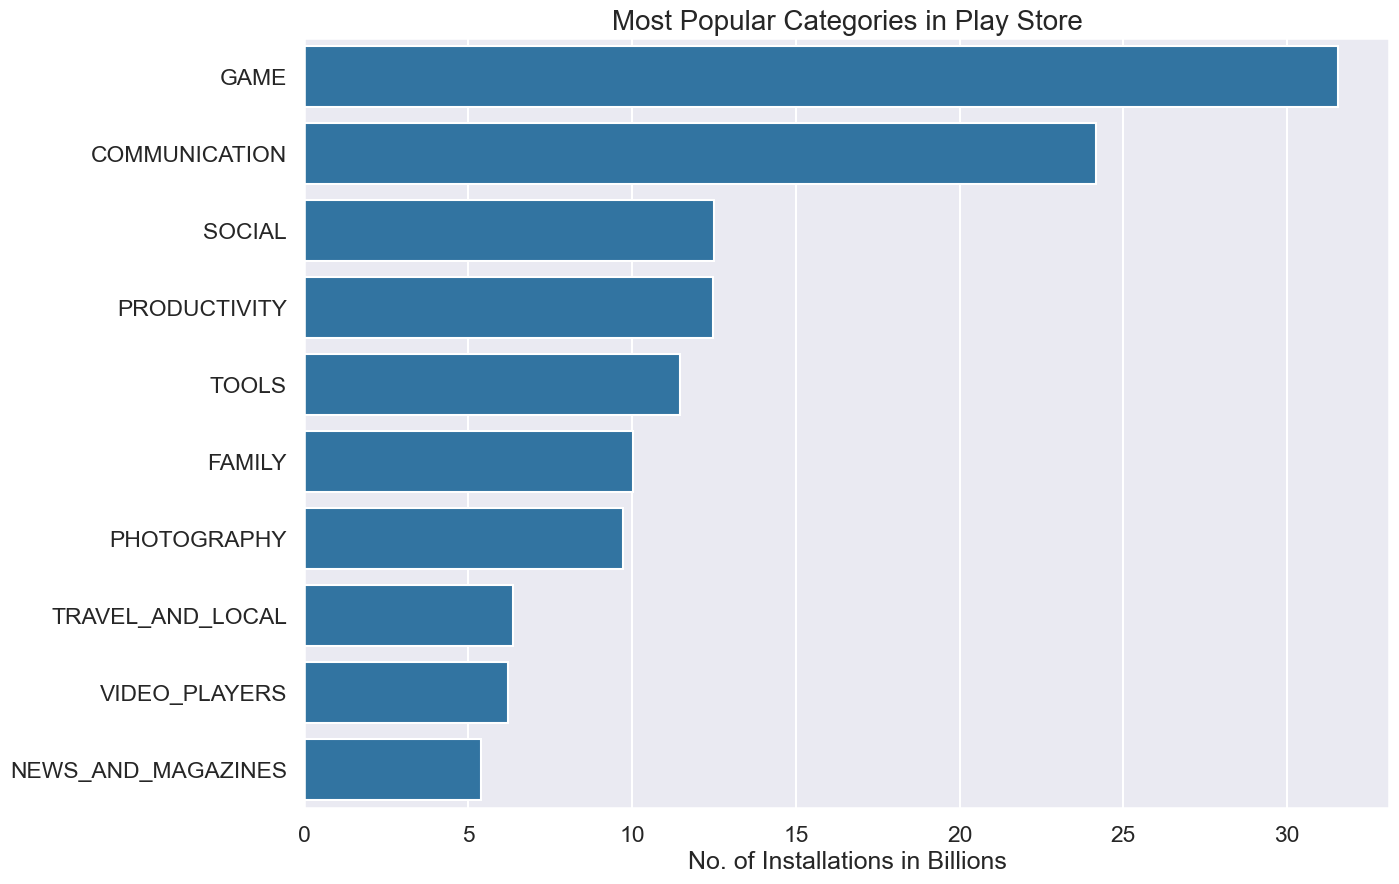

In [360]:
df_cat_installs = df2.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000# converting into billions
dfnew = df_cat_installs.head(10)
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x = 'Installs' , y = 'Category' , data = dfnew )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

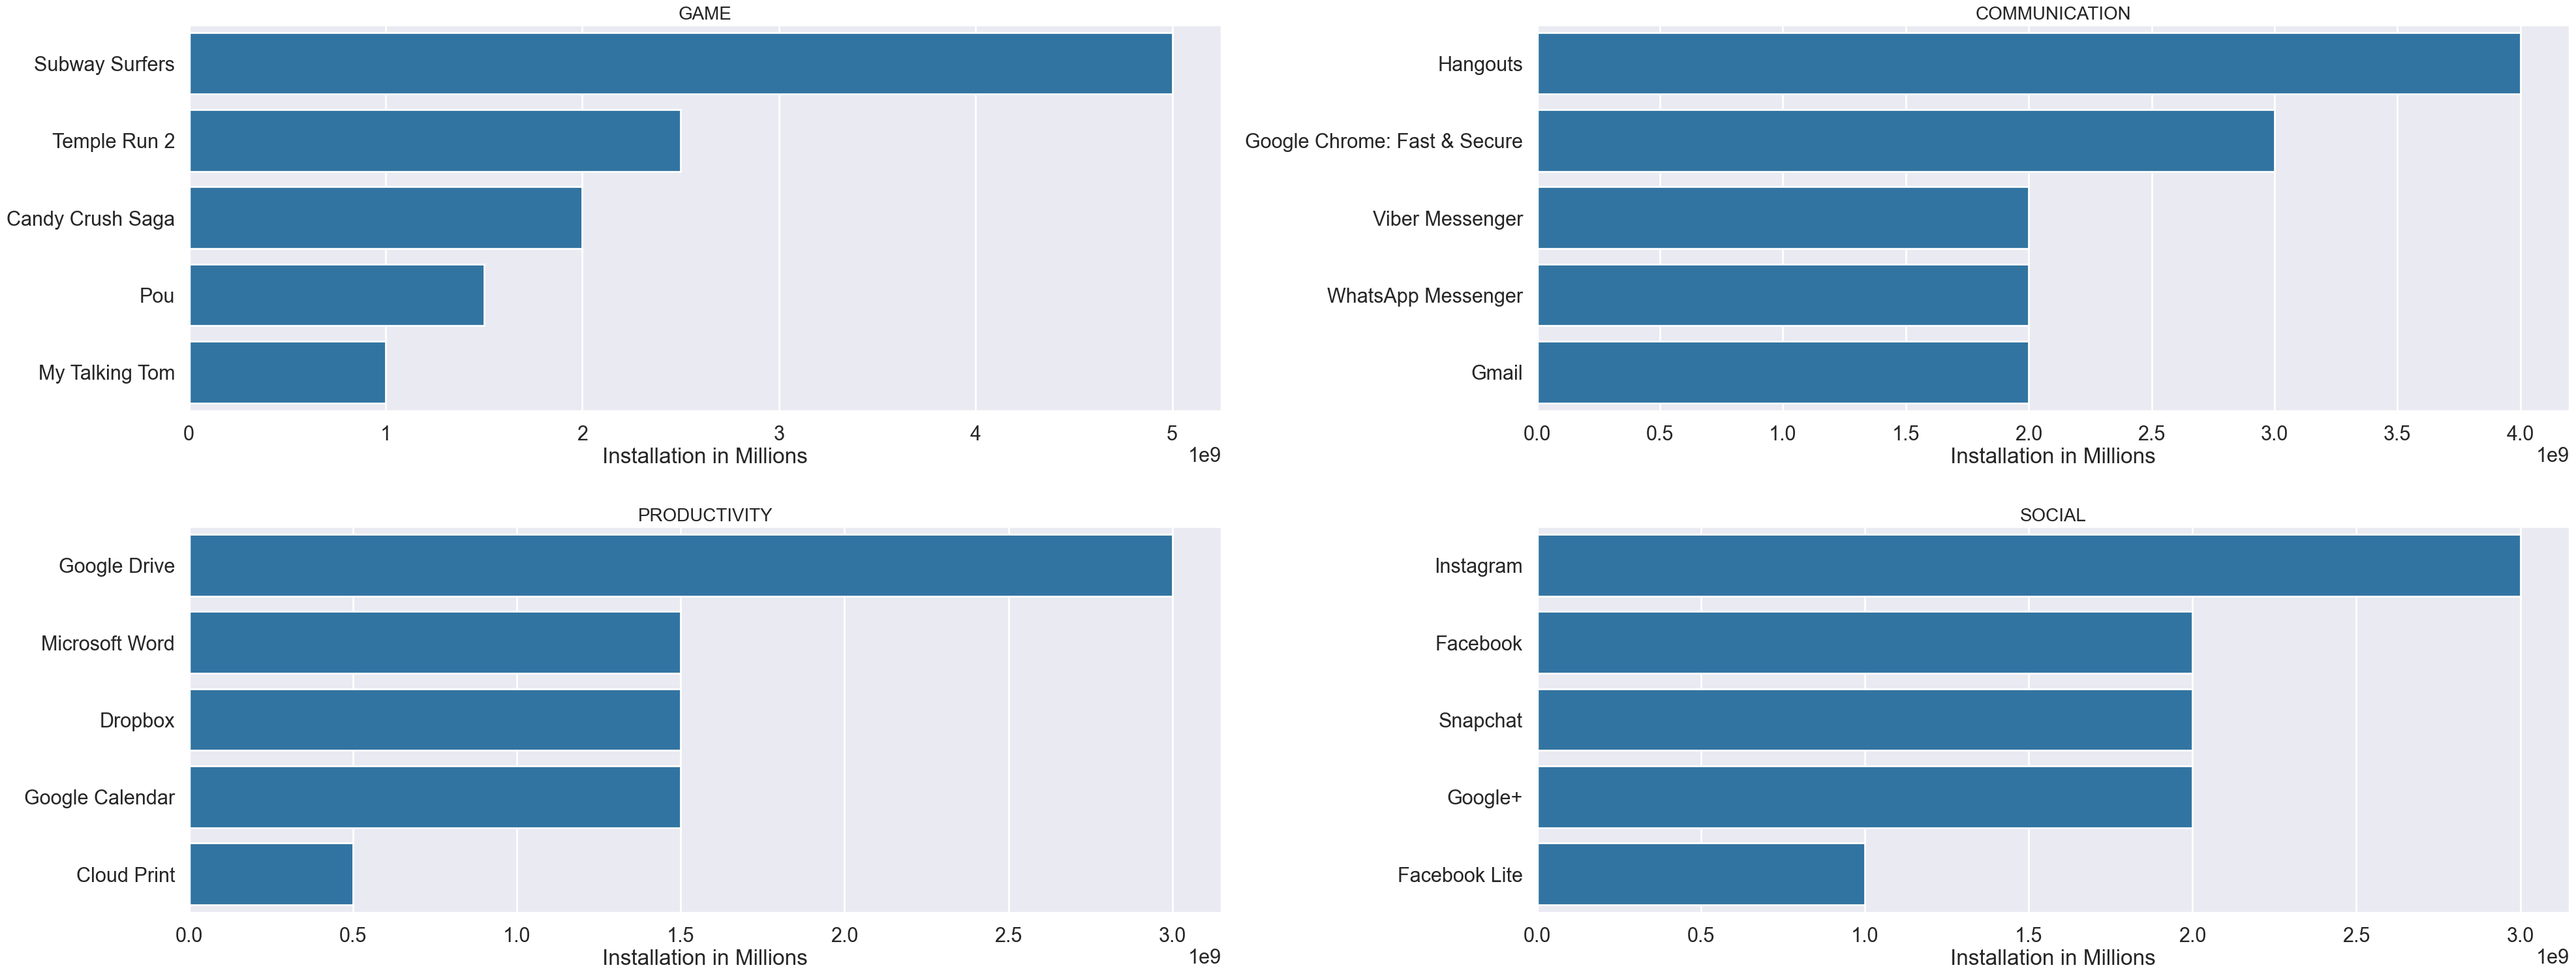

In [361]:
## What are the Top 5 most installed Apps in Each popular Categories ??
dfa = df2.groupby(['Category' ,'App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    dfbix = dfa[dfa.Category == app]
    dfgix = dfbix.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= dfgix,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

## Insights
- Most popular game is Subway Surfers.
- Most popular communication app is Hangouts.
- Most popular productivity app is Google Drive.
- Most popular social app is Instagram.

## How many apps are there on Google Play Store which get 5 ratings??

In [362]:
rating = df2.groupby(['Category','Installs', 'App'])['Rating'].sum().sort_values(ascending = False).reset_index()

toprating_apps = rating[rating.Rating == 5.0]
print("Number of 5 rated apps",toprating_apps.shape[0])
toprating_apps.head(1)

Number of 5 rated apps 271


,Category,Installs,App,Rating
462,SPORTS,100.0,FA Player Essentials,5.0


# ## Result
# - There are 271 five rated apps on Google Play store
# - Top most is 'CT Brain Interpretation' from 'Family' Category